In [2]:
%matplotlib inline
%autoreload 2

/Users/karenyng/Documents/shear_gp/SGP/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)

import george
import pandas as pd
from george.kernels import (ExpSquaredKernel,
                            WhiteKernel,
                            KappaKappaExpSquaredKernel)

import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as dplot

from numpy.linalg import cond

In [4]:
import matplotlib.pyplot as plt

In [5]:
kernels = [ExpSquaredKernel, WhiteKernel]

In [6]:
inv_lambda = 1.
l_sq = .5
noise_amp = 1e-2
p0_rng = (0.01, 100.)
p1_rng = (1e-6, 100.)

rng = (0, 1.)
data_pts_no_per_side = 10

coords, psi = fit.generate_2D_data((inv_lambda, l_sq), 
                                   data_pts_no_per_side,
                                   kernels, rng, noise_amp)


Kernel matrix is positive definite.
Cond # = 7.08e+05


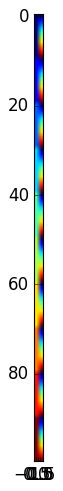

In [7]:
plt.imshow(coords)

In [43]:

optim_gp = \
    fit.optimize_likelihood_in_log10_space([inv_lambda, l_sq, l_sq,
                                            noise_amp], psi, coords,
                                           [ExpSquaredKernel, WhiteKernel])

print ("\nTruth = [{0}, {1}, {2}, {3}]".format(
        inv_lambda, l_sq, l_sq, noise_amp ** 2))


Kernel matrix is positive definite.
Cond # = 7.08e+05
Initial guess : [1.3701227894228918, 0.86254867910644717, 0.39985750775865481]
Optimized lnlikelihood :  271.853261206

Initial lnlikelihood :  269.033069549
Optimized param :  [  6.74070416e-01   4.20357913e-01   4.20357913e-01   6.95121895e-05]

Truth = [1.0, 0.5, 0.5, 0.0001]


Inferred noise_amp =  0.00833739704695


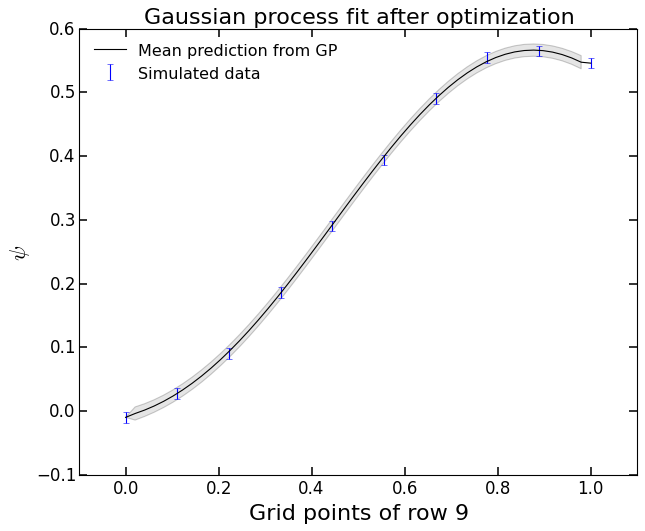

In [151]:
dplot.posterior_predictive_surface_vs_truth(
    optim_gp, coords, psi, 9, data_pts_no_per_side, rng
)